## <h1><center>Homework 1</center></h1>

Instructions:

- Please read the problem description carefully
- Make sure to complete all requirement (shown as bullets) . In general, it would be much easier if you complete the requirements in the order as shown in the problem description


## Q1. Define a function to analyze the frequency of words in a string (3 points)
 - Define a function which does the following:
     * has a string as an input
     * splits the string into a list of tokens by space. 
         - e.g., "it's a hello world!!!" will be split into two tokens ["it's", "a","hello","world!!!"]   
     * if a token starts with or ends with one or more punctuations, remove these punctuations, e.g. "world<font color="red">!!!</font>" -> "world".(<font color="blue">hint, you can import module *string*, use *string.punctuation* to get a list of punctuations, and then use function *strip()* to remove leading or trailing punctuations </font>) 
     * remove the space surrounding each token
     * only keep tokens with 3 or more characters
     * converts all tokens into lower case 
     * create a dictionary to save the count of each unique word 
     * sort the dictionary by word count in descending order
     * return the sorted dictionary 
    

In [ ]:
#Name: Sahil Mahendra Mody
#Cwid: 20007262
#Subject: BIA 660
#Assignment 1


In [15]:
import string
import operator

def text_analyzer_q1(text):
    text=text.replace(".", "")
    text=text.replace(",", "")
    
    
    # initialize a list
    list1 = []
    list2 = []
    
    # split by space (including \tab and \n)
    list1=text.lower().split()

    
    #list1 = [z.translate(string.punctuation) for z in list1 if z]
#     list1 = re.sub(r'[^\w\s]', '', text)
    #print(list1)
    
    for i in list1:

        if len(i) >= 3:
            
            list2.append(i)
    
    # initialize a dict
    diction={}
    # count token frequency
    for i in list2:
        diction[i]=list2.count(i)
#     print(dict)
    
# sort the dict by value
    sort = sorted(diction.items(), key=operator.itemgetter(1),reverse=True)
    output = dict(sort)
   

    return output



In [14]:
# test your code
text = '''Although COVID-19 vaccines remain effective in preventing severe disease, recent data suggest their \
effectiveness at preventing infection or severe illness wanes over time, especially in people ages 65 years and older.\
The recent emergence of the Omicron variant further emphasizes the importance of vaccination, boosters, and \
prevention efforts needed to protect against COVID-19. Everyone is still considered fully vaccinated two weeks after their second dose \
in a two-shot series, such as the Pfizer-BioNTech or Moderna vaccines, or two weeks after a single-dose vaccine, \
such as the J&J/Janssen vaccine. Fully vaccinated, however is not the same as optimally protected.  \
To be optimally protected, a person needs to get a booster shot when and if eligible.
'''


text_analyzer_q1(text)

{'the': 5,
 'and': 3,
 'covid-19': 2,
 'vaccines': 2,
 'preventing': 2,
 'severe': 2,
 'recent': 2,
 'their': 2,
 'fully': 2,
 'vaccinated': 2,
 'two': 2,
 'weeks': 2,
 'after': 2,
 'such': 2,
 'vaccine': 2,
 'optimally': 2,
 'protected': 2,
 'although': 1,
 'remain': 1,
 'effective': 1,
 'disease': 1,
 'data': 1,
 'suggest': 1,
 'effectiveness': 1,
 'infection': 1,
 'illness': 1,
 'wanes': 1,
 'over': 1,
 'time': 1,
 'especially': 1,
 'people': 1,
 'ages': 1,
 'years': 1,
 'olderthe': 1,
 'emergence': 1,
 'omicron': 1,
 'variant': 1,
 'further': 1,
 'emphasizes': 1,
 'importance': 1,
 'vaccination': 1,
 'boosters': 1,
 'prevention': 1,
 'efforts': 1,
 'needed': 1,
 'protect': 1,
 'against': 1,
 'everyone': 1,
 'still': 1,
 'considered': 1,
 'second': 1,
 'dose': 1,
 'two-shot': 1,
 'series': 1,
 'pfizer-biontech': 1,
 'moderna': 1,
 'single-dose': 1,
 'j&j/janssen': 1,
 'however': 1,
 'not': 1,
 'same': 1,
 'person': 1,
 'needs': 1,
 'get': 1,
 'booster': 1,
 'shot': 1,
 'when': 1,
 '

## Q2. Define a function to analyze a numpy array (4 points)
 - Assume we have an array $X$ which contains term frequency of each document. In this array, each row presents a document, each column denotes a word, and each value, say $x_{i,j}$,  denotes the frequency of the word $j$ in document $i$. Therefore, if there are  $m$ documents, $n$ words, $X$ has a shape of $(m, n)$.
 
 Define a function which:
      * Take array $X$ as an input.
      * Divides word frequency $x_{i,j}$ by the total number of words in document $i$. Save the result as an array named $tf$ ($tf$ has shape of $(m,n)$).
      * Calculate the document frequency $df_j$ for word $j$, e.g. how many documents contain word $j$. Save the result to array $df$ ($df$ shape becomes $(n,)$, it's better to keep the dimensions). Note: for this step you need to first convert the array to binary.
      * Calculate $idf_j =  ln(\frac{|m|}{df_j})+1$. m is the number of documents. The reason is, if a word appears in most documents, it does not have the discriminative power. The inverse of $df$ can downgrade the weight of such words. 
      * Finally, for each $x_{i,j}$, calculates $tf\_idf_{i,j} = tf_(i,j) * idf_j$. ($tf\_idf$ has shape of $(m,n)$).
      * Now, please print the following:
          * print the index of the longest document
          * print the indexes of words with the top 4 largest $df$ values
          * for the longest document, print the indexes of words with top 3 largest values in the $tf\_idf$ array (use the index you got previously). 
      * Return the $tf\_idf$ array.
 - Note, for all the steps, **do not use any loop**. Just use array functions and broadcasting for high performance computation.

In [3]:
import numpy as np
import pandas as pd

In [4]:
def text_analyzer_q2(X):
#     print(X)
    
    # get tf 
    
    a=np.sum(X,axis=1)
    maximum = np.where(a == max(a))[0]
   
    tf=np.divide(X.T,a)
    #tf = X / a[:,np.newaxis]
    # get df

    b=np.where(tf.T>0,1,0)
    df=np.sum(b,axis=0)
    df_max = np.argsort(df)

    # get idf
    idf=(np.log(len(X)/df)+1)
    z=tf.T+idf
#     print(z.shape)
#     print(tf.shape)
#     print(tf.T.shape)
#     print(idf.shape)

    # get tf_idf
#     tf_idf=np.mat(tf)*np.mat(z)
    tf_idf=tf.T*(idf)
    f = np.argsort(tf_idf)
    reverse=f[maximum][0][::-1]
    
    
    #print index of the longest documents
   
    print("Indexes of the longest documents: ",maximum)
    
    #print indexes of words with the top 4 largest 𝑑𝑓 values
   
    print("Indexes of words with the top 4 largest df values: ",df_max[:-4:-1])
    
    #return index of top_3 words with largest tf_idf values for the longest document
    
    print("Indexes of words with top 3 largest tf_idf values in the longest document: ",reverse[:3])
    
    return tf_idf


In [5]:
# dtm.csv is a csv file for test. 
# It contains word counts in a few documents
dtm = pd.read_csv("C:/Users/SAHIL MODY/OneDrive/Desktop/Web Mining/dtm.csv")
text_analyzer_q2(dtm.values)


Indexes of the longest documents:  [3]
Indexes of words with the top 4 largest df values:  [12 86 85]
Indexes of words with top 3 largest tf_idf values in the longest document:  [14 64 11]


array([[0.        , 0.        , 0.        , 0.11345382, 0.        ,
        0.13137614, 0.11345382, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13043478, 0.11345382, 0.        ,
        0.        , 0.        , 0.08331699, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.11345382, 0.06568807, 0.        , 0.11345382,
        0.        , 0.        , 0.        , 0.08331699, 0.        ,
        0.        , 0.11345382, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.06568807, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.11345382,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.08331699, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.06568807,
        0.        , 0.        , 0.06568807, 0.08

## Q3. Define a function to analyze a dataset using pandas (3 points)

- The dataset "emotion.csv" contains a number of text and ten types of sentiment scores. Define a function named `emotion_analysis` to do the follows:
   * Read "emotion.csv" as a dataframe with the first row in the csv file as column names
   * Count the number of samples labeled for each emotion (i.e. each value in the column "emotion). Print the counts.
   * Add a column "length" that calculates the number of words for each text. (hint: "apply" function to split the text by space and then count elements in the resulting list)
   * Show the min, max, and mean values of sadness, happiness, and text length for each emotion. Print the results.
   * Create a cross tabulation of average anxiety scores. Use "emotion" as row index, "worry" as column index, and "length" as values. Print the table.
 - This function does not have any return. Just print out the result of each calculation step.

In [6]:
import pandas as pd
def emotion_analysis():
    
    # read data
    df=pd.read_csv("C:/Users/SAHIL MODY/OneDrive/Desktop/Web Mining/emotion.csv")
    df.rename(columns=df.iloc[0])
    print(df.head(2))
    
    # Count the number of samples labeled for each emotion
    print("===The number of samples labeled for each emotion===")
    print(df["emotion"].value_counts())

    
  
    
    # Create a new column called "length"   
    df["length"]=df.text.apply(lambda x: len(x.split(' ')))
    
    # Show the min, max, and mean values
    print("\n")
    print("=== min, max, and mean values of sadness, happiness, and text length for each emotion===")
    result = df.groupby('emotion').agg({'sadness': ['mean', 'min', 'max'],'happiness': ['mean', 'min', 'max'],'length': ['mean', 'min', 'max']})
    print(result)
  
   

    # get cross tab
    print("\n")
    print("=== Cross tabulation of length by emotion and worry ===")
    crosstab=pd.crosstab(index=df.emotion, columns=[df.worry], values=df.length,
            aggfunc=np.average )
    print(crosstab)
       

    # add your code

In [7]:
emotion_analysis()

   worry  emotion  anger  disgust  fear  anxiety  sadness  happiness  \
0      3  Sadness      5        5     3        7        7          2   
1      8  Anxiety      6        7     7        8        6          4   

   relaxation  desire                                               text  
0           4       5  It is less an much an issue of how it affects ...  
1           3       1  I am concerned that the true impact of the cur...  
===The number of samples labeled for each emotion===
Anxiety       1381
Sadness        357
Relaxation     333
Fear           230
Anger          107
Happiness       39
Desire          27
Disgust         17
Name: emotion, dtype: int64


=== min, max, and mean values of sadness, happiness, and text length for each emotion===
             sadness         happiness              length          
                mean min max      mean min max        mean min   max
emotion                                                             
Anger       5.672897   1   

### Bonus question (1 point)
1. Suppose your machine learning model returns a list of probabilities as the output. Write a function to do the following:
    - Given a threshold, say $th$, if a probability > $th$, the prediction is positive; otherwise, negative
    - Compare the prediction with the ground truth labels to calculate the confusion matrix as [[TN, FN],[FP,TP]], where:
        * True Positives (TP): the number of correct positive predictions
        * False Positives (FP): the number of postive predictives which actually are negatives
        * True Negatives (TN): the number of correct negative predictions
        * False Negatives (FN): the number of negative predictives which actually are positives
    - Calculate **precision** as $TP/(TP+FP)$ and **recall** as $TP/(TP+FN)$
    - return precision and recall. 
2. Call this function with $th$ varying from 0.05 to 0.95 with an increase of 0.05. Plot a line chart to see how precision and recall change by $th$

In [8]:
prob =np.array([0.28997326, 0.10166073, 0.10759583, 0.0694934 , 0.6767239 ,
       0.01446897, 0.15268748, 0.15570522, 0.12159665, 0.22593857,
       0.98162019, 0.47418329, 0.09376987, 0.80440782, 0.88361167,
       0.21579844, 0.72343069, 0.06605903, 0.15447797, 0.10967575,
       0.93020135, 0.06570391, 0.05283854, 0.09668829, 0.05974545,
       0.04874688, 0.07562255, 0.11103822, 0.71674525, 0.08507381,
       0.630128  , 0.16447478, 0.16914903, 0.1715767 , 0.08040751,
       0.7001173 , 0.04428363, 0.19469664, 0.12247959, 0.14000294,
       0.02411263, 0.26276603, 0.11377073, 0.07055441, 0.2021157 ,
       0.11636899, 0.90348488, 0.10191679, 0.88744523, 0.18938904])

truth = np.array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0])

In [9]:
def evaluate_performance(prob, truth, th):
#     conf = [[0, 0], [0, 0]]
    predictions=[]
    dict={"TP":0,"TN":0,"FP":0,"FN":0}
    for i in prob:
        if i>th:
            i=1
            predictions.append(i)
        else:
            i=0
            predictions.append(i)
    for a,b in zip(predictions,truth):
        if a==1 and b==1:
            dict["TP"]=dict["TP"]+1
        elif a==1 and b==0:
            dict["FP"]=dict["FP"]+1
        elif a==0 and b==1:
            dict["TN"]=dict["TN"]+1
        elif a==0 and b==0:
            dict["FN"]=dict["FN"]+1
#     print(dict)
    
    precision= dict['TP']/(dict['TP']+dict['FP'])
    recall= dict['TP']/(dict['TP']+dict['TN'])
    return precision, recall

In [10]:
p, r = evaluate_performance(prob, truth, 0.05)

In [11]:
# test with one value

evaluate_performance(prob, truth, 0.05)


(0.2608695652173913, 1.0)

In [12]:
# Test with threhold grid
thresholdvalues = np.arange(0.05, 1.0, step=0.05)
p_list = []
r_list = []
t_list = []

for i in thresholdvalues:
    p, r = evaluate_performance(prob, truth, i)
    p_list.append(p)
    r_list.append(r)
    t_list.append(i)

# print(p_list)
# print(r_list)
# print(t_list)
df=pd.DataFrame({"Threshold":t_list,"Precision": p_list, " Recall": r_list})
df.set_index("Threshold")
print(df)

    


    Threshold  Precision    Recall
0        0.05   0.260870  1.000000
1        0.10   0.342857  1.000000
2        0.15   0.480000  1.000000
3        0.20   0.705882  1.000000
4        0.25   0.857143  1.000000
5        0.30   0.916667  0.916667
6        0.35   0.916667  0.916667
7        0.40   0.916667  0.916667
8        0.45   0.916667  0.916667
9        0.50   0.909091  0.833333
10       0.55   0.909091  0.833333
11       0.60   0.909091  0.833333
12       0.65   0.900000  0.750000
13       0.70   0.888889  0.666667
14       0.75   1.000000  0.500000
15       0.80   1.000000  0.500000
16       0.85   1.000000  0.416667
17       0.90   1.000000  0.250000
18       0.95   1.000000  0.083333


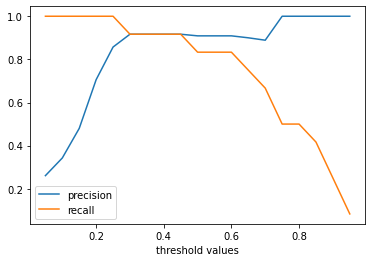

In [13]:
import matplotlib.pyplot as plt
# plot the figure
plt.figure()
plt.plot(t_list, p_list, label="precision")
plt.plot(t_list, r_list, label="recall")
plt.xlabel("threshold values")
plt.legend()
plt.show()